##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# 基本分类：对服装图像进行分类

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://tensorflow.google.cn/tutorials/keras/classification"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">在 TensorFlow.org 上查看</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/keras/classification.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/keras/classification.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">在 GitHub 上查看源代码</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/tutorials/keras/classification.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a></td>
</table>

本指南将训练一个神经网络模型，对运动鞋和衬衫等服装图像进行分类。即使您不理解所有细节也没关系；这只是对完整 TensorFlow 程序的快速概述，详细内容会在您实际操作的同时进行介绍。

本指南使用了 [tf.keras](https://tensorflow.google.cn/guide/keras)，它是 TensorFlow 中用来构建和训练模型的高级 API。

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-11-08 00:31:58.058238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 00:31:58.058290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 00:31:58.059927: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.15.0-rc1


## 导入 Fashion MNIST 数据集

本指南使用 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 数据集，该数据集包含 10 个类别的 70,000 个灰度图像。这些图像以低分辨率（28x28 像素）展示了单件衣物，如下所示：

<table>
  <tr><td>     <img alt="Fashion MNIST sprite" src="https://tensorflow.google.cn/images/fashion-mnist-sprite.png"> </td></tr>
  <tr><td align="center">     <b>图 1.</b>  <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST 样本</a>（由 Zalando 提供，MIT 许可）。<br> </td></tr>
</table>

Fashion MNIST 旨在临时替代经典 [MNIST](http://yann.lecun.com/exdb/mnist/) 数据集，后者常被用作计算机视觉机器学习程序的“Hello, World”。MNIST 数据集包含手写数字（0、1、2 等）的图像，其格式与您将使用的衣物图像的格式相同。

本指南使用 Fashion MNIST 来实现多样化，因为它比常规 MNIST 更具挑战性。这两个数据集都相对较小，都用于验证某个算法是否按预期工作。对于代码的测试和调试，它们都是很好的起点。

在本指南中，我们使用 60,000 张图像来训练网络，使用 10,000 张图像来评估网络学习对图像进行分类的准确程度。您可以直接从 TensorFlow 中访问 Fashion MNIST。直接从 TensorFlow 中导入和加载 Fashion MNIST 数据：

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

加载数据集会返回四个 NumPy 数组：

- `train_images` 和 `train_labels` 数组是*训练集*，即模型用于学习的数据。
- *测试集*、`test_images` 和 `test_labels` 数组会被用来对模型进行测试。

图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。*标签*是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装*类*：

<table>
  <tr>
    <th>标签</th>
    <th>类</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T恤/上衣</td>
  </tr>
  <tr>
    <td>1</td>
    <td>裤子</td>
  </tr>
    <tr>
    <td>2</td>
    <td>套头衫</td>
  </tr>
    <tr>
    <td>3</td>
    <td>连衣裙</td>
  </tr>
    <tr>
    <td>4</td>
    <td>外套</td>
  </tr>
    <tr>
    <td>5</td>
    <td>凉鞋</td>
  </tr>
    <tr>
    <td>6</td>
    <td>衬衫</td>
  </tr>
    <tr>
    <td>7</td>
    <td>运动鞋</td>
  </tr>
    <tr>
    <td>8</td>
    <td>包</td>
  </tr>
    <tr>
    <td>9</td>
    <td>短靴</td>
  </tr>
</table>

每个图像都会被映射到一个标签。由于数据集不包括*类名称*，请将它们存储在下方，供稍后绘制图像时使用：

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 浏览数据

在训练模型之前，我们先浏览一下数据集的格式。以下代码显示训练集中有 60,000 个图像，每个图像由 28 x 28 的像素表示：

In [6]:
train_images.shape

(60000, 28, 28)

同样，训练集中有 60,000 个标签：

In [7]:
len(train_labels)

60000

每个标签都是一个 0 到 9 之间的整数：

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

测试集中有 10,000 个图像。同样，每个图像都由 28x28 个像素表示：

In [9]:
test_images.shape

(10000, 28, 28)

测试集包含 10,000 个图像标签：

In [10]:
len(test_labels)

10000

## 预处理数据

在训练网络之前，必须对数据进行预处理。如果您检查训练集中的第一个图像，您会看到像素值处于 0 到 255 之间：

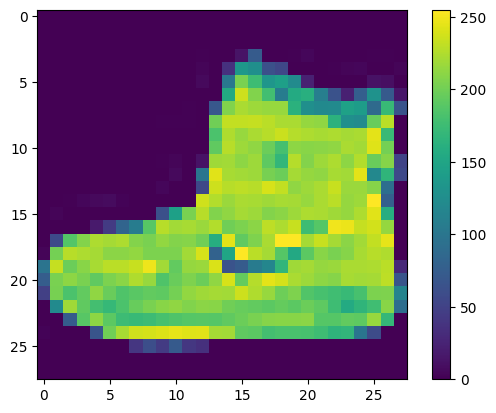

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

将这些值缩小至 0 到 1 之间，然后将其馈送到神经网络模型。为此，请将这些值除以 255。请务必以相同的方式对*训练集*和*测试集*进行预处理：

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

为了验证数据的格式是否正确，以及您是否已准备好构建和训练网络，让我们显示*训练集*中的前 25 个图像，并在每个图像下方显示类名称。

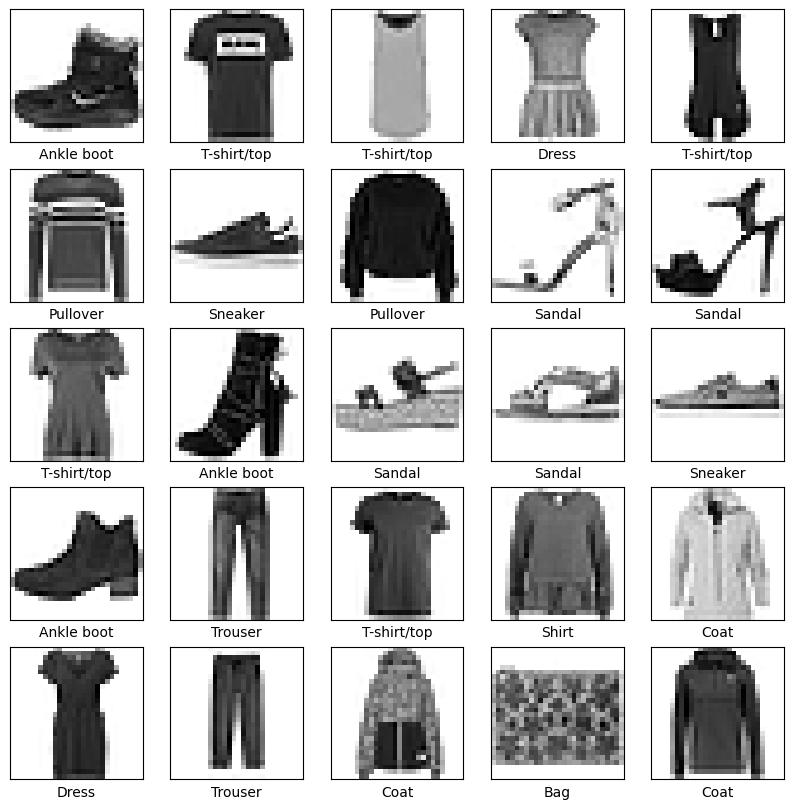

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构建模型

构建神经网络需要先配置模型的层，然后再编译模型。

### 设置层

神经网络的基本组成部分是<em>层</em>。层会从向其馈送的数据中提取表示形式。希望这些表示形式有助于解决手头上的问题。

大多数深度学习都包括将简单的层链接在一起。大多数层（如 `tf.keras.layers.Dense`）都具有在训练期间才会学习的参数。

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

该网络的第一层 `tf.keras.layers.Flatten` 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。

展平像素后，网络会包括两个 `tf.keras.layers.Dense` 层的序列。它们是密集连接或全连接神经层。第一个 `Dense` 层有 128 个节点（或神经元）。第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。

### 编译模型

在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的<em>编译</em>步骤中添加的：

- <em>损失函数</em> - 测量模型在训练期间的准确程度。你希望最小化此函数，以便将模型“引导”到正确的方向上。
- <em>优化器</em> - 决定模型如何根据其看到的数据和自身的损失函数进行更新。
- <em>指标</em> - 用于监控训练和测试步骤。以下示例使用了*准确率*，即被正确分类的图像的比率。

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 训练模型

训练神经网络模型需要执行以下步骤：

1. 将训练数据馈送给模型。在本例中，训练数据位于 `train_images` 和 `train_labels` 数组中。
2. 模型学习将图像和标签关联起来。
3. 要求模型对测试集（在本例中为 `test_images` 数组）进行预测。
4. 验证预测是否与 `test_labels` 数组中的标签相匹配。


### 向模型馈送数据

要开始训练，请调用 <code>model.fit</code> 方法，这样命名是因为该方法会将模型与训练数据进行“拟合”：

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


I0000 00:00:1699403526.188243  897592 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


   1/1875 [..............................] - ETA: 37:33 - loss: 2.2877 - accuracy: 0.1875

  22/1875 [..............................] - ETA: 4s - loss: 1.4739 - accuracy: 0.5099   

  45/1875 [..............................] - ETA: 4s - loss: 1.1708 - accuracy: 0.6042

  67/1875 [>.............................] - ETA: 4s - loss: 1.0255 - accuracy: 0.6516

  89/1875 [>.............................] - ETA: 4s - loss: 0.9342 - accuracy: 0.6815

 111/1875 [>.............................] - ETA: 4s - loss: 0.8816 - accuracy: 0.6976

 133/1875 [=>............................] - ETA: 4s - loss: 0.8403 - accuracy: 0.7126

 155/1875 [=>............................] - ETA: 3s - loss: 0.8162 - accuracy: 0.7188

 178/1875 [=>............................] - ETA: 3s - loss: 0.7830 - accuracy: 0.7314

 201/1875 [==>...........................] - ETA: 3s - loss: 0.7690 - accuracy: 0.7360

 224/1875 [==>...........................] - ETA: 3s - loss: 0.7493 - accuracy: 0.7423

 247/1875 [==>...........................] - ETA: 3s - loss: 0.7371 - accuracy: 0.7458

 270/1875 [===>..........................] - ETA: 3s - loss: 0.7215 - accuracy: 0.7501

 292/1875 [===>..........................] - ETA: 3s - loss: 0.7090 - accuracy: 0.7533

 315/1875 [====>.........................] - ETA: 3s - loss: 0.6962 - accuracy: 0.7580

 337/1875 [====>.........................] - ETA: 3s - loss: 0.6885 - accuracy: 0.7606

 359/1875 [====>.........................] - ETA: 3s - loss: 0.6772 - accuracy: 0.7642

 381/1875 [=====>........................] - ETA: 3s - loss: 0.6712 - accuracy: 0.7676

 403/1875 [=====>........................] - ETA: 3s - loss: 0.6662 - accuracy: 0.7688

 426/1875 [=====>........................] - ETA: 3s - loss: 0.6594 - accuracy: 0.7704

 449/1875 [======>.......................] - ETA: 3s - loss: 0.6513 - accuracy: 0.7739

 472/1875 [======>.......................] - ETA: 3s - loss: 0.6455 - accuracy: 0.7766

 494/1875 [======>.......................] - ETA: 3s - loss: 0.6384 - accuracy: 0.7788

 517/1875 [=======>......................] - ETA: 3s - loss: 0.6341 - accuracy: 0.7806

 540/1875 [=======>......................] - ETA: 3s - loss: 0.6259 - accuracy: 0.7836

 562/1875 [=======>......................] - ETA: 2s - loss: 0.6216 - accuracy: 0.7850

 584/1875 [========>.....................] - ETA: 2s - loss: 0.6179 - accuracy: 0.7859

 606/1875 [========>.....................] - ETA: 2s - loss: 0.6137 - accuracy: 0.7874

 628/1875 [=========>....................] - ETA: 2s - loss: 0.6092 - accuracy: 0.7892

 651/1875 [=========>....................] - ETA: 2s - loss: 0.6050 - accuracy: 0.7901

 674/1875 [=========>....................] - ETA: 2s - loss: 0.6010 - accuracy: 0.7915

 697/1875 [==========>...................] - ETA: 2s - loss: 0.5987 - accuracy: 0.7922

 720/1875 [==========>...................] - ETA: 2s - loss: 0.5944 - accuracy: 0.7940

 742/1875 [==========>...................] - ETA: 2s - loss: 0.5884 - accuracy: 0.7963

 765/1875 [===========>..................] - ETA: 2s - loss: 0.5847 - accuracy: 0.7973

 787/1875 [===========>..................] - ETA: 2s - loss: 0.5822 - accuracy: 0.7982

 810/1875 [===========>..................] - ETA: 2s - loss: 0.5795 - accuracy: 0.7989

 833/1875 [============>.................] - ETA: 2s - loss: 0.5781 - accuracy: 0.7993

 856/1875 [============>.................] - ETA: 2s - loss: 0.5741 - accuracy: 0.8008

 879/1875 [=============>................] - ETA: 2s - loss: 0.5733 - accuracy: 0.8009

 903/1875 [=============>................] - ETA: 2s - loss: 0.5711 - accuracy: 0.8011

 927/1875 [=============>................] - ETA: 2s - loss: 0.5696 - accuracy: 0.8015

 950/1875 [==============>...............] - ETA: 2s - loss: 0.5663 - accuracy: 0.8028

 973/1875 [==============>...............] - ETA: 2s - loss: 0.5639 - accuracy: 0.8033

 996/1875 [==============>...............] - ETA: 1s - loss: 0.5621 - accuracy: 0.8038

1018/1875 [===============>..............] - ETA: 1s - loss: 0.5600 - accuracy: 0.8046

1041/1875 [===============>..............] - ETA: 1s - loss: 0.5569 - accuracy: 0.8054

1064/1875 [================>.............] - ETA: 1s - loss: 0.5554 - accuracy: 0.8061

1088/1875 [================>.............] - ETA: 1s - loss: 0.5535 - accuracy: 0.8067

1112/1875 [================>.............] - ETA: 1s - loss: 0.5512 - accuracy: 0.8074

1136/1875 [=================>............] - ETA: 1s - loss: 0.5491 - accuracy: 0.8081

1160/1875 [=================>............] - ETA: 1s - loss: 0.5480 - accuracy: 0.8083

1184/1875 [=================>............] - ETA: 1s - loss: 0.5459 - accuracy: 0.8089

1207/1875 [==================>...........] - ETA: 1s - loss: 0.5439 - accuracy: 0.8096

1230/1875 [==================>...........] - ETA: 1s - loss: 0.5425 - accuracy: 0.8101

1254/1875 [===================>..........] - ETA: 1s - loss: 0.5417 - accuracy: 0.8102

1278/1875 [===================>..........] - ETA: 1s - loss: 0.5388 - accuracy: 0.8112

1302/1875 [===================>..........] - ETA: 1s - loss: 0.5367 - accuracy: 0.8120

1326/1875 [====================>.........] - ETA: 1s - loss: 0.5339 - accuracy: 0.8130

1350/1875 [====================>.........] - ETA: 1s - loss: 0.5319 - accuracy: 0.8139

1374/1875 [====================>.........] - ETA: 1s - loss: 0.5305 - accuracy: 0.8144

1398/1875 [=====================>........] - ETA: 1s - loss: 0.5287 - accuracy: 0.8148

1422/1875 [=====================>........] - ETA: 1s - loss: 0.5270 - accuracy: 0.8153

1446/1875 [======================>.......] - ETA: 0s - loss: 0.5247 - accuracy: 0.8160

1470/1875 [======================>.......] - ETA: 0s - loss: 0.5219 - accuracy: 0.8169

1494/1875 [======================>.......] - ETA: 0s - loss: 0.5201 - accuracy: 0.8177

1518/1875 [=======================>......] - ETA: 0s - loss: 0.5185 - accuracy: 0.8181

1542/1875 [=======================>......] - ETA: 0s - loss: 0.5161 - accuracy: 0.8188

1566/1875 [========================>.....] - ETA: 0s - loss: 0.5149 - accuracy: 0.8192

1590/1875 [========================>.....] - ETA: 0s - loss: 0.5130 - accuracy: 0.8199

1614/1875 [========================>.....] - ETA: 0s - loss: 0.5116 - accuracy: 0.8204

1638/1875 [=========================>....] - ETA: 0s - loss: 0.5107 - accuracy: 0.8207

1662/1875 [=========================>....] - ETA: 0s - loss: 0.5094 - accuracy: 0.8213

1685/1875 [=========================>....] - ETA: 0s - loss: 0.5077 - accuracy: 0.8219

1708/1875 [==========================>...] - ETA: 0s - loss: 0.5060 - accuracy: 0.8224

1731/1875 [==========================>...] - ETA: 0s - loss: 0.5044 - accuracy: 0.8229

1754/1875 [===========================>..] - ETA: 0s - loss: 0.5029 - accuracy: 0.8232

1777/1875 [===========================>..] - ETA: 0s - loss: 0.5026 - accuracy: 0.8232

1800/1875 [===========================>..] - ETA: 0s - loss: 0.5011 - accuracy: 0.8237

1824/1875 [============================>.] - ETA: 0s - loss: 0.4988 - accuracy: 0.8245

1847/1875 [============================>.] - ETA: 0s - loss: 0.4982 - accuracy: 0.8248

1870/1875 [============================>.] - ETA: 0s - loss: 0.4974 - accuracy: 0.8250

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4970 - accuracy: 0.8251


Epoch 2/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3792 - accuracy: 0.8750

  25/1875 [..............................] - ETA: 3s - loss: 0.3816 - accuracy: 0.8550

  48/1875 [..............................] - ETA: 3s - loss: 0.3995 - accuracy: 0.8535

  71/1875 [>.............................] - ETA: 3s - loss: 0.3925 - accuracy: 0.8600

  94/1875 [>.............................] - ETA: 3s - loss: 0.4140 - accuracy: 0.8497

 117/1875 [>.............................] - ETA: 3s - loss: 0.4066 - accuracy: 0.8502

 140/1875 [=>............................] - ETA: 3s - loss: 0.4156 - accuracy: 0.8471

 162/1875 [=>............................] - ETA: 3s - loss: 0.4211 - accuracy: 0.8447

 185/1875 [=>............................] - ETA: 3s - loss: 0.4241 - accuracy: 0.8443

 207/1875 [==>...........................] - ETA: 3s - loss: 0.4193 - accuracy: 0.8474

 229/1875 [==>...........................] - ETA: 3s - loss: 0.4185 - accuracy: 0.8474

 252/1875 [===>..........................] - ETA: 3s - loss: 0.4161 - accuracy: 0.8493

 275/1875 [===>..........................] - ETA: 3s - loss: 0.4110 - accuracy: 0.8501

 299/1875 [===>..........................] - ETA: 3s - loss: 0.4073 - accuracy: 0.8528

 323/1875 [====>.........................] - ETA: 3s - loss: 0.4074 - accuracy: 0.8522

 347/1875 [====>.........................] - ETA: 3s - loss: 0.4046 - accuracy: 0.8528

 371/1875 [====>.........................] - ETA: 3s - loss: 0.4002 - accuracy: 0.8546

 395/1875 [=====>........................] - ETA: 3s - loss: 0.3987 - accuracy: 0.8553

 419/1875 [=====>........................] - ETA: 3s - loss: 0.3985 - accuracy: 0.8554

 443/1875 [======>.......................] - ETA: 3s - loss: 0.3966 - accuracy: 0.8567

 466/1875 [======>.......................] - ETA: 3s - loss: 0.3961 - accuracy: 0.8570

 490/1875 [======>.......................] - ETA: 3s - loss: 0.3937 - accuracy: 0.8575

 514/1875 [=======>......................] - ETA: 2s - loss: 0.3935 - accuracy: 0.8575

 538/1875 [=======>......................] - ETA: 2s - loss: 0.3934 - accuracy: 0.8575

 562/1875 [=======>......................] - ETA: 2s - loss: 0.3934 - accuracy: 0.8577

 586/1875 [========>.....................] - ETA: 2s - loss: 0.3915 - accuracy: 0.8586

 610/1875 [========>.....................] - ETA: 2s - loss: 0.3914 - accuracy: 0.8584

 633/1875 [=========>....................] - ETA: 2s - loss: 0.3919 - accuracy: 0.8579

 657/1875 [=========>....................] - ETA: 2s - loss: 0.3899 - accuracy: 0.8585

 680/1875 [=========>....................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8597

 703/1875 [==========>...................] - ETA: 2s - loss: 0.3859 - accuracy: 0.8605

 726/1875 [==========>...................] - ETA: 2s - loss: 0.3861 - accuracy: 0.8602

 750/1875 [===========>..................] - ETA: 2s - loss: 0.3870 - accuracy: 0.8600

 774/1875 [===========>..................] - ETA: 2s - loss: 0.3865 - accuracy: 0.8603

 797/1875 [===========>..................] - ETA: 2s - loss: 0.3861 - accuracy: 0.8608

 820/1875 [============>.................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8603

 843/1875 [============>.................] - ETA: 2s - loss: 0.3867 - accuracy: 0.8602

 865/1875 [============>.................] - ETA: 2s - loss: 0.3861 - accuracy: 0.8604

 887/1875 [=============>................] - ETA: 2s - loss: 0.3851 - accuracy: 0.8607

 908/1875 [=============>................] - ETA: 2s - loss: 0.3845 - accuracy: 0.8607

 930/1875 [=============>................] - ETA: 2s - loss: 0.3846 - accuracy: 0.8605

 953/1875 [==============>...............] - ETA: 2s - loss: 0.3856 - accuracy: 0.8604

 976/1875 [==============>...............] - ETA: 1s - loss: 0.3862 - accuracy: 0.8604

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3873 - accuracy: 0.8603

1024/1875 [===============>..............] - ETA: 1s - loss: 0.3868 - accuracy: 0.8607

1047/1875 [===============>..............] - ETA: 1s - loss: 0.3861 - accuracy: 0.8607

1070/1875 [================>.............] - ETA: 1s - loss: 0.3858 - accuracy: 0.8609

1094/1875 [================>.............] - ETA: 1s - loss: 0.3856 - accuracy: 0.8608

1117/1875 [================>.............] - ETA: 1s - loss: 0.3849 - accuracy: 0.8611

1140/1875 [=================>............] - ETA: 1s - loss: 0.3853 - accuracy: 0.8608

1163/1875 [=================>............] - ETA: 1s - loss: 0.3845 - accuracy: 0.8611

1187/1875 [=================>............] - ETA: 1s - loss: 0.3834 - accuracy: 0.8613

1211/1875 [==================>...........] - ETA: 1s - loss: 0.3833 - accuracy: 0.8614

1234/1875 [==================>...........] - ETA: 1s - loss: 0.3837 - accuracy: 0.8613

1258/1875 [===================>..........] - ETA: 1s - loss: 0.3834 - accuracy: 0.8612

1282/1875 [===================>..........] - ETA: 1s - loss: 0.3832 - accuracy: 0.8613

1306/1875 [===================>..........] - ETA: 1s - loss: 0.3827 - accuracy: 0.8613

1330/1875 [====================>.........] - ETA: 1s - loss: 0.3822 - accuracy: 0.8616

1353/1875 [====================>.........] - ETA: 1s - loss: 0.3817 - accuracy: 0.8615

1377/1875 [=====================>........] - ETA: 1s - loss: 0.3822 - accuracy: 0.8613

1401/1875 [=====================>........] - ETA: 1s - loss: 0.3817 - accuracy: 0.8615

1424/1875 [=====================>........] - ETA: 0s - loss: 0.3819 - accuracy: 0.8615

1447/1875 [======================>.......] - ETA: 0s - loss: 0.3819 - accuracy: 0.8615

1471/1875 [======================>.......] - ETA: 0s - loss: 0.3811 - accuracy: 0.8620

1495/1875 [======================>.......] - ETA: 0s - loss: 0.3801 - accuracy: 0.8623

1519/1875 [=======================>......] - ETA: 0s - loss: 0.3795 - accuracy: 0.8626

1543/1875 [=======================>......] - ETA: 0s - loss: 0.3798 - accuracy: 0.8625

1567/1875 [========================>.....] - ETA: 0s - loss: 0.3799 - accuracy: 0.8625

1590/1875 [========================>.....] - ETA: 0s - loss: 0.3803 - accuracy: 0.8624

1614/1875 [========================>.....] - ETA: 0s - loss: 0.3801 - accuracy: 0.8624

1637/1875 [=========================>....] - ETA: 0s - loss: 0.3801 - accuracy: 0.8624

1661/1875 [=========================>....] - ETA: 0s - loss: 0.3803 - accuracy: 0.8624

1685/1875 [=========================>....] - ETA: 0s - loss: 0.3796 - accuracy: 0.8627

1708/1875 [==========================>...] - ETA: 0s - loss: 0.3798 - accuracy: 0.8627

1732/1875 [==========================>...] - ETA: 0s - loss: 0.3802 - accuracy: 0.8624

1756/1875 [===========================>..] - ETA: 0s - loss: 0.3796 - accuracy: 0.8626

1780/1875 [===========================>..] - ETA: 0s - loss: 0.3796 - accuracy: 0.8626

1803/1875 [===========================>..] - ETA: 0s - loss: 0.3790 - accuracy: 0.8627

1826/1875 [============================>.] - ETA: 0s - loss: 0.3782 - accuracy: 0.8630

1850/1875 [============================>.] - ETA: 0s - loss: 0.3780 - accuracy: 0.8630

1874/1875 [============================>.] - ETA: 0s - loss: 0.3780 - accuracy: 0.8630

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3780 - accuracy: 0.8631


Epoch 3/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1599 - accuracy: 0.9062

  25/1875 [..............................] - ETA: 3s - loss: 0.3453 - accuracy: 0.8662

  49/1875 [..............................] - ETA: 3s - loss: 0.3509 - accuracy: 0.8680

  73/1875 [>.............................] - ETA: 3s - loss: 0.3429 - accuracy: 0.8729

  97/1875 [>.............................] - ETA: 3s - loss: 0.3535 - accuracy: 0.8692

 121/1875 [>.............................] - ETA: 3s - loss: 0.3477 - accuracy: 0.8727

 145/1875 [=>............................] - ETA: 3s - loss: 0.3479 - accuracy: 0.8739

 169/1875 [=>............................] - ETA: 3s - loss: 0.3415 - accuracy: 0.8752

 193/1875 [==>...........................] - ETA: 3s - loss: 0.3417 - accuracy: 0.8761

 216/1875 [==>...........................] - ETA: 3s - loss: 0.3364 - accuracy: 0.8776

 240/1875 [==>...........................] - ETA: 3s - loss: 0.3327 - accuracy: 0.8783

 263/1875 [===>..........................] - ETA: 3s - loss: 0.3333 - accuracy: 0.8776

 286/1875 [===>..........................] - ETA: 3s - loss: 0.3350 - accuracy: 0.8771

 310/1875 [===>..........................] - ETA: 3s - loss: 0.3330 - accuracy: 0.8780

 333/1875 [====>.........................] - ETA: 3s - loss: 0.3306 - accuracy: 0.8788

 356/1875 [====>.........................] - ETA: 3s - loss: 0.3297 - accuracy: 0.8790

 380/1875 [=====>........................] - ETA: 3s - loss: 0.3312 - accuracy: 0.8793

 403/1875 [=====>........................] - ETA: 3s - loss: 0.3301 - accuracy: 0.8800

 426/1875 [=====>........................] - ETA: 3s - loss: 0.3321 - accuracy: 0.8796

 449/1875 [======>.......................] - ETA: 3s - loss: 0.3317 - accuracy: 0.8795

 472/1875 [======>.......................] - ETA: 3s - loss: 0.3328 - accuracy: 0.8791

 495/1875 [======>.......................] - ETA: 3s - loss: 0.3337 - accuracy: 0.8787

 518/1875 [=======>......................] - ETA: 2s - loss: 0.3348 - accuracy: 0.8784

 541/1875 [=======>......................] - ETA: 2s - loss: 0.3356 - accuracy: 0.8779

 564/1875 [========>.....................] - ETA: 2s - loss: 0.3356 - accuracy: 0.8780

 587/1875 [========>.....................] - ETA: 2s - loss: 0.3355 - accuracy: 0.8781

 610/1875 [========>.....................] - ETA: 2s - loss: 0.3342 - accuracy: 0.8786

 633/1875 [=========>....................] - ETA: 2s - loss: 0.3357 - accuracy: 0.8780

 655/1875 [=========>....................] - ETA: 2s - loss: 0.3371 - accuracy: 0.8779

 677/1875 [=========>....................] - ETA: 2s - loss: 0.3359 - accuracy: 0.8781

 700/1875 [==========>...................] - ETA: 2s - loss: 0.3376 - accuracy: 0.8782

 722/1875 [==========>...................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8784

 745/1875 [==========>...................] - ETA: 2s - loss: 0.3386 - accuracy: 0.8782

 767/1875 [===========>..................] - ETA: 2s - loss: 0.3386 - accuracy: 0.8783

 789/1875 [===========>..................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8788

 811/1875 [===========>..................] - ETA: 2s - loss: 0.3389 - accuracy: 0.8789

 833/1875 [============>.................] - ETA: 2s - loss: 0.3397 - accuracy: 0.8788

 856/1875 [============>.................] - ETA: 2s - loss: 0.3391 - accuracy: 0.8789

 878/1875 [=============>................] - ETA: 2s - loss: 0.3387 - accuracy: 0.8791

 901/1875 [=============>................] - ETA: 2s - loss: 0.3385 - accuracy: 0.8790

 923/1875 [=============>................] - ETA: 2s - loss: 0.3387 - accuracy: 0.8790

 946/1875 [==============>...............] - ETA: 2s - loss: 0.3388 - accuracy: 0.8788

 969/1875 [==============>...............] - ETA: 2s - loss: 0.3395 - accuracy: 0.8785

 992/1875 [==============>...............] - ETA: 1s - loss: 0.3389 - accuracy: 0.8787

1015/1875 [===============>..............] - ETA: 1s - loss: 0.3382 - accuracy: 0.8789

1037/1875 [===============>..............] - ETA: 1s - loss: 0.3388 - accuracy: 0.8786

1059/1875 [===============>..............] - ETA: 1s - loss: 0.3388 - accuracy: 0.8788

1082/1875 [================>.............] - ETA: 1s - loss: 0.3379 - accuracy: 0.8790

1105/1875 [================>.............] - ETA: 1s - loss: 0.3376 - accuracy: 0.8792

1128/1875 [=================>............] - ETA: 1s - loss: 0.3370 - accuracy: 0.8793

1151/1875 [=================>............] - ETA: 1s - loss: 0.3361 - accuracy: 0.8795

1174/1875 [=================>............] - ETA: 1s - loss: 0.3355 - accuracy: 0.8798

1196/1875 [==================>...........] - ETA: 1s - loss: 0.3353 - accuracy: 0.8797

1219/1875 [==================>...........] - ETA: 1s - loss: 0.3359 - accuracy: 0.8791

1242/1875 [==================>...........] - ETA: 1s - loss: 0.3356 - accuracy: 0.8792

1265/1875 [===================>..........] - ETA: 1s - loss: 0.3370 - accuracy: 0.8787

1287/1875 [===================>..........] - ETA: 1s - loss: 0.3377 - accuracy: 0.8783

1310/1875 [===================>..........] - ETA: 1s - loss: 0.3374 - accuracy: 0.8783

1333/1875 [====================>.........] - ETA: 1s - loss: 0.3369 - accuracy: 0.8784

1355/1875 [====================>.........] - ETA: 1s - loss: 0.3370 - accuracy: 0.8784

1377/1875 [=====================>........] - ETA: 1s - loss: 0.3374 - accuracy: 0.8783

1399/1875 [=====================>........] - ETA: 1s - loss: 0.3374 - accuracy: 0.8785

1422/1875 [=====================>........] - ETA: 1s - loss: 0.3373 - accuracy: 0.8784

1445/1875 [======================>.......] - ETA: 0s - loss: 0.3372 - accuracy: 0.8783

1468/1875 [======================>.......] - ETA: 0s - loss: 0.3374 - accuracy: 0.8784

1490/1875 [======================>.......] - ETA: 0s - loss: 0.3375 - accuracy: 0.8781

1513/1875 [=======================>......] - ETA: 0s - loss: 0.3377 - accuracy: 0.8780

1536/1875 [=======================>......] - ETA: 0s - loss: 0.3375 - accuracy: 0.8781

1558/1875 [=======================>......] - ETA: 0s - loss: 0.3375 - accuracy: 0.8781

1580/1875 [========================>.....] - ETA: 0s - loss: 0.3376 - accuracy: 0.8779

1603/1875 [========================>.....] - ETA: 0s - loss: 0.3375 - accuracy: 0.8779

1625/1875 [=========================>....] - ETA: 0s - loss: 0.3374 - accuracy: 0.8780

1647/1875 [=========================>....] - ETA: 0s - loss: 0.3374 - accuracy: 0.8777

1670/1875 [=========================>....] - ETA: 0s - loss: 0.3376 - accuracy: 0.8776

1694/1875 [==========================>...] - ETA: 0s - loss: 0.3379 - accuracy: 0.8777

1717/1875 [==========================>...] - ETA: 0s - loss: 0.3379 - accuracy: 0.8777

1739/1875 [==========================>...] - ETA: 0s - loss: 0.3373 - accuracy: 0.8778

1762/1875 [===========================>..] - ETA: 0s - loss: 0.3376 - accuracy: 0.8777

1785/1875 [===========================>..] - ETA: 0s - loss: 0.3377 - accuracy: 0.8774

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3378 - accuracy: 0.8773

1831/1875 [============================>.] - ETA: 0s - loss: 0.3377 - accuracy: 0.8773

1854/1875 [============================>.] - ETA: 0s - loss: 0.3373 - accuracy: 0.8776

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3374 - accuracy: 0.8776


Epoch 4/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2594 - accuracy: 0.8750

  24/1875 [..............................] - ETA: 4s - loss: 0.3302 - accuracy: 0.8906

  47/1875 [..............................] - ETA: 4s - loss: 0.3097 - accuracy: 0.8963

  70/1875 [>.............................] - ETA: 4s - loss: 0.3129 - accuracy: 0.8911

  92/1875 [>.............................] - ETA: 3s - loss: 0.3155 - accuracy: 0.8886

 115/1875 [>.............................] - ETA: 3s - loss: 0.3046 - accuracy: 0.8916

 137/1875 [=>............................] - ETA: 3s - loss: 0.3071 - accuracy: 0.8885

 160/1875 [=>............................] - ETA: 3s - loss: 0.3116 - accuracy: 0.8857

 182/1875 [=>............................] - ETA: 3s - loss: 0.3151 - accuracy: 0.8838

 205/1875 [==>...........................] - ETA: 3s - loss: 0.3172 - accuracy: 0.8829

 227/1875 [==>...........................] - ETA: 3s - loss: 0.3169 - accuracy: 0.8831

 249/1875 [==>...........................] - ETA: 3s - loss: 0.3186 - accuracy: 0.8817

 272/1875 [===>..........................] - ETA: 3s - loss: 0.3186 - accuracy: 0.8814

 294/1875 [===>..........................] - ETA: 3s - loss: 0.3217 - accuracy: 0.8806

 317/1875 [====>.........................] - ETA: 3s - loss: 0.3221 - accuracy: 0.8812

 340/1875 [====>.........................] - ETA: 3s - loss: 0.3237 - accuracy: 0.8814

 363/1875 [====>.........................] - ETA: 3s - loss: 0.3256 - accuracy: 0.8814

 386/1875 [=====>........................] - ETA: 3s - loss: 0.3242 - accuracy: 0.8821

 409/1875 [=====>........................] - ETA: 3s - loss: 0.3229 - accuracy: 0.8832

 432/1875 [=====>........................] - ETA: 3s - loss: 0.3228 - accuracy: 0.8832

 455/1875 [======>.......................] - ETA: 3s - loss: 0.3232 - accuracy: 0.8830

 478/1875 [======>.......................] - ETA: 3s - loss: 0.3225 - accuracy: 0.8830

 502/1875 [=======>......................] - ETA: 3s - loss: 0.3213 - accuracy: 0.8830

 526/1875 [=======>......................] - ETA: 3s - loss: 0.3212 - accuracy: 0.8832

 549/1875 [=======>......................] - ETA: 2s - loss: 0.3190 - accuracy: 0.8837

 572/1875 [========>.....................] - ETA: 2s - loss: 0.3198 - accuracy: 0.8832

 595/1875 [========>.....................] - ETA: 2s - loss: 0.3191 - accuracy: 0.8836

 617/1875 [========>.....................] - ETA: 2s - loss: 0.3198 - accuracy: 0.8836

 640/1875 [=========>....................] - ETA: 2s - loss: 0.3207 - accuracy: 0.8835

 662/1875 [=========>....................] - ETA: 2s - loss: 0.3204 - accuracy: 0.8832

 685/1875 [=========>....................] - ETA: 2s - loss: 0.3190 - accuracy: 0.8836

 708/1875 [==========>...................] - ETA: 2s - loss: 0.3192 - accuracy: 0.8836

 731/1875 [==========>...................] - ETA: 2s - loss: 0.3181 - accuracy: 0.8842

 753/1875 [===========>..................] - ETA: 2s - loss: 0.3196 - accuracy: 0.8838

 776/1875 [===========>..................] - ETA: 2s - loss: 0.3194 - accuracy: 0.8837

 799/1875 [===========>..................] - ETA: 2s - loss: 0.3187 - accuracy: 0.8840

 822/1875 [============>.................] - ETA: 2s - loss: 0.3175 - accuracy: 0.8841

 844/1875 [============>.................] - ETA: 2s - loss: 0.3175 - accuracy: 0.8841

 866/1875 [============>.................] - ETA: 2s - loss: 0.3172 - accuracy: 0.8842

 888/1875 [=============>................] - ETA: 2s - loss: 0.3163 - accuracy: 0.8844

 910/1875 [=============>................] - ETA: 2s - loss: 0.3168 - accuracy: 0.8842

 932/1875 [=============>................] - ETA: 2s - loss: 0.3162 - accuracy: 0.8842

 955/1875 [==============>...............] - ETA: 2s - loss: 0.3155 - accuracy: 0.8843

 977/1875 [==============>...............] - ETA: 2s - loss: 0.3158 - accuracy: 0.8841

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3158 - accuracy: 0.8845

1022/1875 [===============>..............] - ETA: 1s - loss: 0.3155 - accuracy: 0.8847

1045/1875 [===============>..............] - ETA: 1s - loss: 0.3154 - accuracy: 0.8847

1068/1875 [================>.............] - ETA: 1s - loss: 0.3149 - accuracy: 0.8849

1090/1875 [================>.............] - ETA: 1s - loss: 0.3152 - accuracy: 0.8849

1112/1875 [================>.............] - ETA: 1s - loss: 0.3150 - accuracy: 0.8851

1135/1875 [=================>............] - ETA: 1s - loss: 0.3149 - accuracy: 0.8851

1158/1875 [=================>............] - ETA: 1s - loss: 0.3147 - accuracy: 0.8852

1180/1875 [=================>............] - ETA: 1s - loss: 0.3164 - accuracy: 0.8846

1203/1875 [==================>...........] - ETA: 1s - loss: 0.3166 - accuracy: 0.8847

1227/1875 [==================>...........] - ETA: 1s - loss: 0.3163 - accuracy: 0.8849

1250/1875 [===================>..........] - ETA: 1s - loss: 0.3160 - accuracy: 0.8851

1273/1875 [===================>..........] - ETA: 1s - loss: 0.3162 - accuracy: 0.8850

1296/1875 [===================>..........] - ETA: 1s - loss: 0.3164 - accuracy: 0.8851

1319/1875 [====================>.........] - ETA: 1s - loss: 0.3155 - accuracy: 0.8853

1342/1875 [====================>.........] - ETA: 1s - loss: 0.3146 - accuracy: 0.8858

1365/1875 [====================>.........] - ETA: 1s - loss: 0.3142 - accuracy: 0.8858

1388/1875 [=====================>........] - ETA: 1s - loss: 0.3140 - accuracy: 0.8858

1411/1875 [=====================>........] - ETA: 1s - loss: 0.3145 - accuracy: 0.8859

1434/1875 [=====================>........] - ETA: 0s - loss: 0.3150 - accuracy: 0.8857

1456/1875 [======================>.......] - ETA: 0s - loss: 0.3146 - accuracy: 0.8857

1479/1875 [======================>.......] - ETA: 0s - loss: 0.3152 - accuracy: 0.8855

1502/1875 [=======================>......] - ETA: 0s - loss: 0.3148 - accuracy: 0.8857

1525/1875 [=======================>......] - ETA: 0s - loss: 0.3155 - accuracy: 0.8854

1549/1875 [=======================>......] - ETA: 0s - loss: 0.3152 - accuracy: 0.8855

1572/1875 [========================>.....] - ETA: 0s - loss: 0.3156 - accuracy: 0.8854

1595/1875 [========================>.....] - ETA: 0s - loss: 0.3158 - accuracy: 0.8853

1618/1875 [========================>.....] - ETA: 0s - loss: 0.3160 - accuracy: 0.8852

1641/1875 [=========================>....] - ETA: 0s - loss: 0.3154 - accuracy: 0.8855

1664/1875 [=========================>....] - ETA: 0s - loss: 0.3154 - accuracy: 0.8854

1687/1875 [=========================>....] - ETA: 0s - loss: 0.3155 - accuracy: 0.8854

1710/1875 [==========================>...] - ETA: 0s - loss: 0.3148 - accuracy: 0.8857

1733/1875 [==========================>...] - ETA: 0s - loss: 0.3147 - accuracy: 0.8856

1756/1875 [===========================>..] - ETA: 0s - loss: 0.3144 - accuracy: 0.8857

1779/1875 [===========================>..] - ETA: 0s - loss: 0.3143 - accuracy: 0.8857

1802/1875 [===========================>..] - ETA: 0s - loss: 0.3146 - accuracy: 0.8857

1825/1875 [============================>.] - ETA: 0s - loss: 0.3150 - accuracy: 0.8855

1848/1875 [============================>.] - ETA: 0s - loss: 0.3151 - accuracy: 0.8854

1871/1875 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8857

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.8857


Epoch 5/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1982 - accuracy: 0.8750

  24/1875 [..............................] - ETA: 4s - loss: 0.2783 - accuracy: 0.8945

  47/1875 [..............................] - ETA: 4s - loss: 0.2889 - accuracy: 0.8883

  70/1875 [>.............................] - ETA: 4s - loss: 0.2995 - accuracy: 0.8884

  93/1875 [>.............................] - ETA: 4s - loss: 0.2984 - accuracy: 0.8884

 115/1875 [>.............................] - ETA: 3s - loss: 0.2946 - accuracy: 0.8886

 138/1875 [=>............................] - ETA: 3s - loss: 0.2957 - accuracy: 0.8904

 161/1875 [=>............................] - ETA: 3s - loss: 0.3000 - accuracy: 0.8901

 184/1875 [=>............................] - ETA: 3s - loss: 0.3056 - accuracy: 0.8877

 207/1875 [==>...........................] - ETA: 3s - loss: 0.3084 - accuracy: 0.8860

 230/1875 [==>...........................] - ETA: 3s - loss: 0.3128 - accuracy: 0.8834

 253/1875 [===>..........................] - ETA: 3s - loss: 0.3113 - accuracy: 0.8843

 276/1875 [===>..........................] - ETA: 3s - loss: 0.3118 - accuracy: 0.8839

 299/1875 [===>..........................] - ETA: 3s - loss: 0.3105 - accuracy: 0.8841

 322/1875 [====>.........................] - ETA: 3s - loss: 0.3098 - accuracy: 0.8844

 345/1875 [====>.........................] - ETA: 3s - loss: 0.3090 - accuracy: 0.8843

 368/1875 [====>.........................] - ETA: 3s - loss: 0.3090 - accuracy: 0.8849

 391/1875 [=====>........................] - ETA: 3s - loss: 0.3080 - accuracy: 0.8857

 414/1875 [=====>........................] - ETA: 3s - loss: 0.3078 - accuracy: 0.8867

 437/1875 [=====>........................] - ETA: 3s - loss: 0.3065 - accuracy: 0.8870

 460/1875 [======>.......................] - ETA: 3s - loss: 0.3065 - accuracy: 0.8874

 483/1875 [======>.......................] - ETA: 3s - loss: 0.3060 - accuracy: 0.8878

 506/1875 [=======>......................] - ETA: 3s - loss: 0.3055 - accuracy: 0.8883

 529/1875 [=======>......................] - ETA: 3s - loss: 0.3058 - accuracy: 0.8886

 552/1875 [=======>......................] - ETA: 2s - loss: 0.3058 - accuracy: 0.8885

 575/1875 [========>.....................] - ETA: 2s - loss: 0.3051 - accuracy: 0.8886

 599/1875 [========>.....................] - ETA: 2s - loss: 0.3055 - accuracy: 0.8884

 622/1875 [========>.....................] - ETA: 2s - loss: 0.3045 - accuracy: 0.8886

 645/1875 [=========>....................] - ETA: 2s - loss: 0.3050 - accuracy: 0.8883

 668/1875 [=========>....................] - ETA: 2s - loss: 0.3054 - accuracy: 0.8883

 691/1875 [==========>...................] - ETA: 2s - loss: 0.3040 - accuracy: 0.8881

 714/1875 [==========>...................] - ETA: 2s - loss: 0.3025 - accuracy: 0.8887

 737/1875 [==========>...................] - ETA: 2s - loss: 0.3009 - accuracy: 0.8894

 760/1875 [===========>..................] - ETA: 2s - loss: 0.3020 - accuracy: 0.8893

 783/1875 [===========>..................] - ETA: 2s - loss: 0.3025 - accuracy: 0.8891

 806/1875 [===========>..................] - ETA: 2s - loss: 0.3031 - accuracy: 0.8890

 829/1875 [============>.................] - ETA: 2s - loss: 0.3012 - accuracy: 0.8899

 852/1875 [============>.................] - ETA: 2s - loss: 0.3005 - accuracy: 0.8901

 875/1875 [=============>................] - ETA: 2s - loss: 0.3006 - accuracy: 0.8896

 898/1875 [=============>................] - ETA: 2s - loss: 0.3006 - accuracy: 0.8897

 921/1875 [=============>................] - ETA: 2s - loss: 0.2994 - accuracy: 0.8902

 944/1875 [==============>...............] - ETA: 2s - loss: 0.2996 - accuracy: 0.8904

 967/1875 [==============>...............] - ETA: 2s - loss: 0.2992 - accuracy: 0.8906

 990/1875 [==============>...............] - ETA: 1s - loss: 0.2998 - accuracy: 0.8903

1013/1875 [===============>..............] - ETA: 1s - loss: 0.3004 - accuracy: 0.8903

1037/1875 [===============>..............] - ETA: 1s - loss: 0.3004 - accuracy: 0.8902

1061/1875 [===============>..............] - ETA: 1s - loss: 0.3002 - accuracy: 0.8902

1085/1875 [================>.............] - ETA: 1s - loss: 0.2996 - accuracy: 0.8901

1109/1875 [================>.............] - ETA: 1s - loss: 0.3001 - accuracy: 0.8899

1132/1875 [=================>............] - ETA: 1s - loss: 0.2997 - accuracy: 0.8902

1155/1875 [=================>............] - ETA: 1s - loss: 0.3001 - accuracy: 0.8898

1179/1875 [=================>............] - ETA: 1s - loss: 0.3003 - accuracy: 0.8898

1203/1875 [==================>...........] - ETA: 1s - loss: 0.2995 - accuracy: 0.8901

1225/1875 [==================>...........] - ETA: 1s - loss: 0.2986 - accuracy: 0.8905

1248/1875 [==================>...........] - ETA: 1s - loss: 0.2979 - accuracy: 0.8908

1271/1875 [===================>..........] - ETA: 1s - loss: 0.2979 - accuracy: 0.8907

1294/1875 [===================>..........] - ETA: 1s - loss: 0.2981 - accuracy: 0.8905

1318/1875 [====================>.........] - ETA: 1s - loss: 0.2980 - accuracy: 0.8905

1342/1875 [====================>.........] - ETA: 1s - loss: 0.2982 - accuracy: 0.8904

1365/1875 [====================>.........] - ETA: 1s - loss: 0.2979 - accuracy: 0.8903

1388/1875 [=====================>........] - ETA: 1s - loss: 0.2975 - accuracy: 0.8903

1411/1875 [=====================>........] - ETA: 1s - loss: 0.2973 - accuracy: 0.8904

1434/1875 [=====================>........] - ETA: 0s - loss: 0.2976 - accuracy: 0.8903

1457/1875 [======================>.......] - ETA: 0s - loss: 0.2973 - accuracy: 0.8904

1479/1875 [======================>.......] - ETA: 0s - loss: 0.2971 - accuracy: 0.8905

1502/1875 [=======================>......] - ETA: 0s - loss: 0.2966 - accuracy: 0.8905

1526/1875 [=======================>......] - ETA: 0s - loss: 0.2972 - accuracy: 0.8902

1550/1875 [=======================>......] - ETA: 0s - loss: 0.2974 - accuracy: 0.8902

1573/1875 [========================>.....] - ETA: 0s - loss: 0.2974 - accuracy: 0.8903

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2967 - accuracy: 0.8905

1620/1875 [========================>.....] - ETA: 0s - loss: 0.2968 - accuracy: 0.8905

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2964 - accuracy: 0.8907

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2960 - accuracy: 0.8909

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2960 - accuracy: 0.8909

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2959 - accuracy: 0.8909

1737/1875 [==========================>...] - ETA: 0s - loss: 0.2959 - accuracy: 0.8908

1760/1875 [===========================>..] - ETA: 0s - loss: 0.2964 - accuracy: 0.8907

1783/1875 [===========================>..] - ETA: 0s - loss: 0.2963 - accuracy: 0.8905

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2969 - accuracy: 0.8904

1831/1875 [============================>.] - ETA: 0s - loss: 0.2966 - accuracy: 0.8905

1855/1875 [============================>.] - ETA: 0s - loss: 0.2964 - accuracy: 0.8906

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8910


Epoch 6/10


   1/1875 [..............................] - ETA: 5s - loss: 0.4928 - accuracy: 0.8438

  24/1875 [..............................] - ETA: 4s - loss: 0.2643 - accuracy: 0.8945

  47/1875 [..............................] - ETA: 4s - loss: 0.2758 - accuracy: 0.8989

  71/1875 [>.............................] - ETA: 3s - loss: 0.2686 - accuracy: 0.9001

  94/1875 [>.............................] - ETA: 3s - loss: 0.2705 - accuracy: 0.8953

 117/1875 [>.............................] - ETA: 3s - loss: 0.2764 - accuracy: 0.8948

 140/1875 [=>............................] - ETA: 3s - loss: 0.2764 - accuracy: 0.8962

 164/1875 [=>............................] - ETA: 3s - loss: 0.2802 - accuracy: 0.8946

 188/1875 [==>...........................] - ETA: 3s - loss: 0.2893 - accuracy: 0.8913

 211/1875 [==>...........................] - ETA: 3s - loss: 0.2869 - accuracy: 0.8917

 234/1875 [==>...........................] - ETA: 3s - loss: 0.2845 - accuracy: 0.8929

 258/1875 [===>..........................] - ETA: 3s - loss: 0.2837 - accuracy: 0.8939

 282/1875 [===>..........................] - ETA: 3s - loss: 0.2844 - accuracy: 0.8928

 306/1875 [===>..........................] - ETA: 3s - loss: 0.2801 - accuracy: 0.8950

 330/1875 [====>.........................] - ETA: 3s - loss: 0.2804 - accuracy: 0.8957

 355/1875 [====>.........................] - ETA: 3s - loss: 0.2803 - accuracy: 0.8960

 377/1875 [=====>........................] - ETA: 3s - loss: 0.2789 - accuracy: 0.8961

 400/1875 [=====>........................] - ETA: 3s - loss: 0.2808 - accuracy: 0.8959

 423/1875 [=====>........................] - ETA: 3s - loss: 0.2780 - accuracy: 0.8966

 447/1875 [======>.......................] - ETA: 3s - loss: 0.2769 - accuracy: 0.8963

 471/1875 [======>.......................] - ETA: 3s - loss: 0.2786 - accuracy: 0.8950

 495/1875 [======>.......................] - ETA: 2s - loss: 0.2811 - accuracy: 0.8945

 518/1875 [=======>......................] - ETA: 2s - loss: 0.2791 - accuracy: 0.8951

 541/1875 [=======>......................] - ETA: 2s - loss: 0.2778 - accuracy: 0.8953

 564/1875 [========>.....................] - ETA: 2s - loss: 0.2782 - accuracy: 0.8953

 587/1875 [========>.....................] - ETA: 2s - loss: 0.2783 - accuracy: 0.8952

 610/1875 [========>.....................] - ETA: 2s - loss: 0.2759 - accuracy: 0.8967

 633/1875 [=========>....................] - ETA: 2s - loss: 0.2757 - accuracy: 0.8970

 656/1875 [=========>....................] - ETA: 2s - loss: 0.2753 - accuracy: 0.8967

 679/1875 [=========>....................] - ETA: 2s - loss: 0.2756 - accuracy: 0.8970

 702/1875 [==========>...................] - ETA: 2s - loss: 0.2770 - accuracy: 0.8966

 727/1875 [==========>...................] - ETA: 2s - loss: 0.2772 - accuracy: 0.8968

 751/1875 [===========>..................] - ETA: 2s - loss: 0.2777 - accuracy: 0.8966

 774/1875 [===========>..................] - ETA: 2s - loss: 0.2788 - accuracy: 0.8964

 797/1875 [===========>..................] - ETA: 2s - loss: 0.2783 - accuracy: 0.8966

 820/1875 [============>.................] - ETA: 2s - loss: 0.2797 - accuracy: 0.8960

 843/1875 [============>.................] - ETA: 2s - loss: 0.2804 - accuracy: 0.8955

 866/1875 [============>.................] - ETA: 2s - loss: 0.2803 - accuracy: 0.8957

 889/1875 [=============>................] - ETA: 2s - loss: 0.2802 - accuracy: 0.8956

 913/1875 [=============>................] - ETA: 2s - loss: 0.2816 - accuracy: 0.8953

 936/1875 [=============>................] - ETA: 2s - loss: 0.2811 - accuracy: 0.8954

 959/1875 [==============>...............] - ETA: 1s - loss: 0.2803 - accuracy: 0.8958

 982/1875 [==============>...............] - ETA: 1s - loss: 0.2798 - accuracy: 0.8960

1005/1875 [===============>..............] - ETA: 1s - loss: 0.2798 - accuracy: 0.8961

1028/1875 [===============>..............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8960

1051/1875 [===============>..............] - ETA: 1s - loss: 0.2791 - accuracy: 0.8964

1074/1875 [================>.............] - ETA: 1s - loss: 0.2792 - accuracy: 0.8966

1098/1875 [================>.............] - ETA: 1s - loss: 0.2784 - accuracy: 0.8965

1122/1875 [================>.............] - ETA: 1s - loss: 0.2793 - accuracy: 0.8960

1146/1875 [=================>............] - ETA: 1s - loss: 0.2796 - accuracy: 0.8961

1169/1875 [=================>............] - ETA: 1s - loss: 0.2787 - accuracy: 0.8964

1192/1875 [==================>...........] - ETA: 1s - loss: 0.2792 - accuracy: 0.8962

1215/1875 [==================>...........] - ETA: 1s - loss: 0.2802 - accuracy: 0.8959

1238/1875 [==================>...........] - ETA: 1s - loss: 0.2811 - accuracy: 0.8955

1261/1875 [===================>..........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8954

1284/1875 [===================>..........] - ETA: 1s - loss: 0.2814 - accuracy: 0.8956

1307/1875 [===================>..........] - ETA: 1s - loss: 0.2823 - accuracy: 0.8953

1331/1875 [====================>.........] - ETA: 1s - loss: 0.2823 - accuracy: 0.8953

1354/1875 [====================>.........] - ETA: 1s - loss: 0.2823 - accuracy: 0.8953

1378/1875 [=====================>........] - ETA: 1s - loss: 0.2820 - accuracy: 0.8954

1401/1875 [=====================>........] - ETA: 1s - loss: 0.2817 - accuracy: 0.8956

1424/1875 [=====================>........] - ETA: 0s - loss: 0.2813 - accuracy: 0.8959

1447/1875 [======================>.......] - ETA: 0s - loss: 0.2811 - accuracy: 0.8960

1469/1875 [======================>.......] - ETA: 0s - loss: 0.2812 - accuracy: 0.8960

1492/1875 [======================>.......] - ETA: 0s - loss: 0.2813 - accuracy: 0.8959

1515/1875 [=======================>......] - ETA: 0s - loss: 0.2818 - accuracy: 0.8955

1538/1875 [=======================>......] - ETA: 0s - loss: 0.2816 - accuracy: 0.8956

1561/1875 [=======================>......] - ETA: 0s - loss: 0.2819 - accuracy: 0.8954

1584/1875 [========================>.....] - ETA: 0s - loss: 0.2819 - accuracy: 0.8955

1607/1875 [========================>.....] - ETA: 0s - loss: 0.2824 - accuracy: 0.8956

1630/1875 [=========================>....] - ETA: 0s - loss: 0.2819 - accuracy: 0.8959

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2817 - accuracy: 0.8959

1678/1875 [=========================>....] - ETA: 0s - loss: 0.2813 - accuracy: 0.8961

1701/1875 [==========================>...] - ETA: 0s - loss: 0.2813 - accuracy: 0.8961

1724/1875 [==========================>...] - ETA: 0s - loss: 0.2808 - accuracy: 0.8962

1747/1875 [==========================>...] - ETA: 0s - loss: 0.2808 - accuracy: 0.8962

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2802 - accuracy: 0.8964

1793/1875 [===========================>..] - ETA: 0s - loss: 0.2804 - accuracy: 0.8964

1816/1875 [============================>.] - ETA: 0s - loss: 0.2803 - accuracy: 0.8965

1839/1875 [============================>.] - ETA: 0s - loss: 0.2801 - accuracy: 0.8964

1862/1875 [============================>.] - ETA: 0s - loss: 0.2805 - accuracy: 0.8963

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2805 - accuracy: 0.8965


Epoch 7/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3247 - accuracy: 0.8438

  24/1875 [..............................] - ETA: 4s - loss: 0.2538 - accuracy: 0.9089

  47/1875 [..............................] - ETA: 4s - loss: 0.2626 - accuracy: 0.9056

  70/1875 [>.............................] - ETA: 4s - loss: 0.2674 - accuracy: 0.9031

  93/1875 [>.............................] - ETA: 3s - loss: 0.2761 - accuracy: 0.9032

 116/1875 [>.............................] - ETA: 3s - loss: 0.2765 - accuracy: 0.9019

 139/1875 [=>............................] - ETA: 3s - loss: 0.2727 - accuracy: 0.9045

 161/1875 [=>............................] - ETA: 3s - loss: 0.2733 - accuracy: 0.9022

 184/1875 [=>............................] - ETA: 3s - loss: 0.2736 - accuracy: 0.9015

 206/1875 [==>...........................] - ETA: 3s - loss: 0.2727 - accuracy: 0.9019

 229/1875 [==>...........................] - ETA: 3s - loss: 0.2709 - accuracy: 0.9023

 252/1875 [===>..........................] - ETA: 3s - loss: 0.2721 - accuracy: 0.9019

 275/1875 [===>..........................] - ETA: 3s - loss: 0.2700 - accuracy: 0.9033

 298/1875 [===>..........................] - ETA: 3s - loss: 0.2699 - accuracy: 0.9032

 321/1875 [====>.........................] - ETA: 3s - loss: 0.2703 - accuracy: 0.9031

 344/1875 [====>.........................] - ETA: 3s - loss: 0.2707 - accuracy: 0.9028

 367/1875 [====>.........................] - ETA: 3s - loss: 0.2731 - accuracy: 0.9022

 390/1875 [=====>........................] - ETA: 3s - loss: 0.2745 - accuracy: 0.9018

 414/1875 [=====>........................] - ETA: 3s - loss: 0.2741 - accuracy: 0.9023

 438/1875 [======>.......................] - ETA: 3s - loss: 0.2766 - accuracy: 0.9013

 461/1875 [======>.......................] - ETA: 3s - loss: 0.2752 - accuracy: 0.9014

 485/1875 [======>.......................] - ETA: 3s - loss: 0.2741 - accuracy: 0.9020

 508/1875 [=======>......................] - ETA: 3s - loss: 0.2723 - accuracy: 0.9023

 531/1875 [=======>......................] - ETA: 2s - loss: 0.2720 - accuracy: 0.9025

 554/1875 [=======>......................] - ETA: 2s - loss: 0.2734 - accuracy: 0.9019

 577/1875 [========>.....................] - ETA: 2s - loss: 0.2720 - accuracy: 0.9022

 600/1875 [========>.....................] - ETA: 2s - loss: 0.2718 - accuracy: 0.9023

 623/1875 [========>.....................] - ETA: 2s - loss: 0.2720 - accuracy: 0.9020

 647/1875 [=========>....................] - ETA: 2s - loss: 0.2707 - accuracy: 0.9024

 670/1875 [=========>....................] - ETA: 2s - loss: 0.2714 - accuracy: 0.9020

 693/1875 [==========>...................] - ETA: 2s - loss: 0.2708 - accuracy: 0.9023

 716/1875 [==========>...................] - ETA: 2s - loss: 0.2715 - accuracy: 0.9024

 739/1875 [==========>...................] - ETA: 2s - loss: 0.2708 - accuracy: 0.9025

 762/1875 [===========>..................] - ETA: 2s - loss: 0.2718 - accuracy: 0.9019

 785/1875 [===========>..................] - ETA: 2s - loss: 0.2717 - accuracy: 0.9016

 808/1875 [===========>..................] - ETA: 2s - loss: 0.2709 - accuracy: 0.9013

 831/1875 [============>.................] - ETA: 2s - loss: 0.2711 - accuracy: 0.9012

 854/1875 [============>.................] - ETA: 2s - loss: 0.2710 - accuracy: 0.9010

 877/1875 [=============>................] - ETA: 2s - loss: 0.2703 - accuracy: 0.9010

 900/1875 [=============>................] - ETA: 2s - loss: 0.2698 - accuracy: 0.9014

 923/1875 [=============>................] - ETA: 2s - loss: 0.2698 - accuracy: 0.9011

 947/1875 [==============>...............] - ETA: 2s - loss: 0.2699 - accuracy: 0.9014

 971/1875 [==============>...............] - ETA: 1s - loss: 0.2695 - accuracy: 0.9012

 995/1875 [==============>...............] - ETA: 1s - loss: 0.2690 - accuracy: 0.9014

1018/1875 [===============>..............] - ETA: 1s - loss: 0.2695 - accuracy: 0.9012

1042/1875 [===============>..............] - ETA: 1s - loss: 0.2689 - accuracy: 0.9015

1065/1875 [================>.............] - ETA: 1s - loss: 0.2684 - accuracy: 0.9017

1088/1875 [================>.............] - ETA: 1s - loss: 0.2693 - accuracy: 0.9014

1111/1875 [================>.............] - ETA: 1s - loss: 0.2704 - accuracy: 0.9009

1134/1875 [=================>............] - ETA: 1s - loss: 0.2702 - accuracy: 0.9010

1157/1875 [=================>............] - ETA: 1s - loss: 0.2711 - accuracy: 0.9007

1180/1875 [=================>............] - ETA: 1s - loss: 0.2711 - accuracy: 0.9005

1203/1875 [==================>...........] - ETA: 1s - loss: 0.2712 - accuracy: 0.9002

1226/1875 [==================>...........] - ETA: 1s - loss: 0.2704 - accuracy: 0.9005

1249/1875 [==================>...........] - ETA: 1s - loss: 0.2699 - accuracy: 0.9007

1272/1875 [===================>..........] - ETA: 1s - loss: 0.2690 - accuracy: 0.9011

1295/1875 [===================>..........] - ETA: 1s - loss: 0.2695 - accuracy: 0.9010

1318/1875 [====================>.........] - ETA: 1s - loss: 0.2690 - accuracy: 0.9011

1341/1875 [====================>.........] - ETA: 1s - loss: 0.2690 - accuracy: 0.9010

1365/1875 [====================>.........] - ETA: 1s - loss: 0.2697 - accuracy: 0.9008

1389/1875 [=====================>........] - ETA: 1s - loss: 0.2700 - accuracy: 0.9007

1412/1875 [=====================>........] - ETA: 1s - loss: 0.2704 - accuracy: 0.9007

1435/1875 [=====================>........] - ETA: 0s - loss: 0.2705 - accuracy: 0.9006

1458/1875 [======================>.......] - ETA: 0s - loss: 0.2702 - accuracy: 0.9009

1481/1875 [======================>.......] - ETA: 0s - loss: 0.2704 - accuracy: 0.9006

1504/1875 [=======================>......] - ETA: 0s - loss: 0.2706 - accuracy: 0.9006

1527/1875 [=======================>......] - ETA: 0s - loss: 0.2703 - accuracy: 0.9008

1550/1875 [=======================>......] - ETA: 0s - loss: 0.2705 - accuracy: 0.9007

1573/1875 [========================>.....] - ETA: 0s - loss: 0.2709 - accuracy: 0.9007

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2713 - accuracy: 0.9004

1620/1875 [========================>.....] - ETA: 0s - loss: 0.2713 - accuracy: 0.9003

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2704 - accuracy: 0.9007

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2701 - accuracy: 0.9008

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2705 - accuracy: 0.9006

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2705 - accuracy: 0.9006

1737/1875 [==========================>...] - ETA: 0s - loss: 0.2702 - accuracy: 0.9007

1760/1875 [===========================>..] - ETA: 0s - loss: 0.2697 - accuracy: 0.9009

1783/1875 [===========================>..] - ETA: 0s - loss: 0.2694 - accuracy: 0.9009

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2697 - accuracy: 0.9008

1827/1875 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.9007

1851/1875 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.9008

1874/1875 [============================>.] - ETA: 0s - loss: 0.2704 - accuracy: 0.9007

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9007


Epoch 8/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3601 - accuracy: 0.8750

  24/1875 [..............................] - ETA: 4s - loss: 0.2529 - accuracy: 0.9010

  47/1875 [..............................] - ETA: 4s - loss: 0.2425 - accuracy: 0.9069

  70/1875 [>.............................] - ETA: 4s - loss: 0.2405 - accuracy: 0.9089

  93/1875 [>.............................] - ETA: 3s - loss: 0.2428 - accuracy: 0.9073

 116/1875 [>.............................] - ETA: 3s - loss: 0.2469 - accuracy: 0.9046

 139/1875 [=>............................] - ETA: 3s - loss: 0.2480 - accuracy: 0.9051

 162/1875 [=>............................] - ETA: 3s - loss: 0.2524 - accuracy: 0.9032

 185/1875 [=>............................] - ETA: 3s - loss: 0.2513 - accuracy: 0.9041

 207/1875 [==>...........................] - ETA: 3s - loss: 0.2531 - accuracy: 0.9032

 230/1875 [==>...........................] - ETA: 3s - loss: 0.2511 - accuracy: 0.9034

 253/1875 [===>..........................] - ETA: 3s - loss: 0.2541 - accuracy: 0.9030

 276/1875 [===>..........................] - ETA: 3s - loss: 0.2540 - accuracy: 0.9023

 299/1875 [===>..........................] - ETA: 3s - loss: 0.2538 - accuracy: 0.9024

 322/1875 [====>.........................] - ETA: 3s - loss: 0.2521 - accuracy: 0.9029

 345/1875 [====>.........................] - ETA: 3s - loss: 0.2536 - accuracy: 0.9023

 367/1875 [====>.........................] - ETA: 3s - loss: 0.2548 - accuracy: 0.9021

 389/1875 [=====>........................] - ETA: 3s - loss: 0.2544 - accuracy: 0.9023

 411/1875 [=====>........................] - ETA: 3s - loss: 0.2508 - accuracy: 0.9039

 433/1875 [=====>........................] - ETA: 3s - loss: 0.2498 - accuracy: 0.9044

 455/1875 [======>.......................] - ETA: 3s - loss: 0.2501 - accuracy: 0.9047

 477/1875 [======>.......................] - ETA: 3s - loss: 0.2485 - accuracy: 0.9051

 499/1875 [======>.......................] - ETA: 3s - loss: 0.2481 - accuracy: 0.9052

 522/1875 [=======>......................] - ETA: 3s - loss: 0.2474 - accuracy: 0.9060

 544/1875 [=======>......................] - ETA: 3s - loss: 0.2470 - accuracy: 0.9062

 567/1875 [========>.....................] - ETA: 2s - loss: 0.2474 - accuracy: 0.9059

 590/1875 [========>.....................] - ETA: 2s - loss: 0.2469 - accuracy: 0.9065

 612/1875 [========>.....................] - ETA: 2s - loss: 0.2479 - accuracy: 0.9059

 635/1875 [=========>....................] - ETA: 2s - loss: 0.2493 - accuracy: 0.9050

 657/1875 [=========>....................] - ETA: 2s - loss: 0.2501 - accuracy: 0.9050

 679/1875 [=========>....................] - ETA: 2s - loss: 0.2507 - accuracy: 0.9048

 701/1875 [==========>...................] - ETA: 2s - loss: 0.2496 - accuracy: 0.9054

 724/1875 [==========>...................] - ETA: 2s - loss: 0.2505 - accuracy: 0.9046

 746/1875 [==========>...................] - ETA: 2s - loss: 0.2523 - accuracy: 0.9038

 769/1875 [===========>..................] - ETA: 2s - loss: 0.2526 - accuracy: 0.9034

 791/1875 [===========>..................] - ETA: 2s - loss: 0.2524 - accuracy: 0.9040

 813/1875 [============>.................] - ETA: 2s - loss: 0.2528 - accuracy: 0.9039

 835/1875 [============>.................] - ETA: 2s - loss: 0.2536 - accuracy: 0.9037

 857/1875 [============>.................] - ETA: 2s - loss: 0.2529 - accuracy: 0.9040

 879/1875 [=============>................] - ETA: 2s - loss: 0.2528 - accuracy: 0.9041

 901/1875 [=============>................] - ETA: 2s - loss: 0.2537 - accuracy: 0.9040

 924/1875 [=============>................] - ETA: 2s - loss: 0.2545 - accuracy: 0.9039

 947/1875 [==============>...............] - ETA: 2s - loss: 0.2546 - accuracy: 0.9038

 970/1875 [==============>...............] - ETA: 2s - loss: 0.2550 - accuracy: 0.9037

 992/1875 [==============>...............] - ETA: 2s - loss: 0.2547 - accuracy: 0.9041

1015/1875 [===============>..............] - ETA: 1s - loss: 0.2554 - accuracy: 0.9039

1037/1875 [===============>..............] - ETA: 1s - loss: 0.2551 - accuracy: 0.9042

1059/1875 [===============>..............] - ETA: 1s - loss: 0.2549 - accuracy: 0.9042

1081/1875 [================>.............] - ETA: 1s - loss: 0.2550 - accuracy: 0.9043

1104/1875 [================>.............] - ETA: 1s - loss: 0.2561 - accuracy: 0.9038

1126/1875 [=================>............] - ETA: 1s - loss: 0.2559 - accuracy: 0.9037

1148/1875 [=================>............] - ETA: 1s - loss: 0.2567 - accuracy: 0.9036

1172/1875 [=================>............] - ETA: 1s - loss: 0.2567 - accuracy: 0.9036

1195/1875 [==================>...........] - ETA: 1s - loss: 0.2559 - accuracy: 0.9038

1219/1875 [==================>...........] - ETA: 1s - loss: 0.2564 - accuracy: 0.9037

1243/1875 [==================>...........] - ETA: 1s - loss: 0.2572 - accuracy: 0.9032

1266/1875 [===================>..........] - ETA: 1s - loss: 0.2570 - accuracy: 0.9033

1289/1875 [===================>..........] - ETA: 1s - loss: 0.2574 - accuracy: 0.9032

1313/1875 [====================>.........] - ETA: 1s - loss: 0.2578 - accuracy: 0.9029

1337/1875 [====================>.........] - ETA: 1s - loss: 0.2575 - accuracy: 0.9028

1360/1875 [====================>.........] - ETA: 1s - loss: 0.2572 - accuracy: 0.9031

1382/1875 [=====================>........] - ETA: 1s - loss: 0.2574 - accuracy: 0.9031

1404/1875 [=====================>........] - ETA: 1s - loss: 0.2574 - accuracy: 0.9033

1426/1875 [=====================>........] - ETA: 1s - loss: 0.2571 - accuracy: 0.9034

1448/1875 [======================>.......] - ETA: 0s - loss: 0.2575 - accuracy: 0.9031

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2576 - accuracy: 0.9029

1492/1875 [======================>.......] - ETA: 0s - loss: 0.2581 - accuracy: 0.9028

1514/1875 [=======================>......] - ETA: 0s - loss: 0.2584 - accuracy: 0.9027

1537/1875 [=======================>......] - ETA: 0s - loss: 0.2581 - accuracy: 0.9029

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2584 - accuracy: 0.9029

1582/1875 [========================>.....] - ETA: 0s - loss: 0.2582 - accuracy: 0.9031

1605/1875 [========================>.....] - ETA: 0s - loss: 0.2581 - accuracy: 0.9032

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2582 - accuracy: 0.9032

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2579 - accuracy: 0.9032

1675/1875 [=========================>....] - ETA: 0s - loss: 0.2581 - accuracy: 0.9032

1699/1875 [==========================>...] - ETA: 0s - loss: 0.2576 - accuracy: 0.9033

1722/1875 [==========================>...] - ETA: 0s - loss: 0.2576 - accuracy: 0.9032

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2579 - accuracy: 0.9031

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2582 - accuracy: 0.9032

1789/1875 [===========================>..] - ETA: 0s - loss: 0.2584 - accuracy: 0.9031

1811/1875 [===========================>..] - ETA: 0s - loss: 0.2590 - accuracy: 0.9031

1834/1875 [============================>.] - ETA: 0s - loss: 0.2594 - accuracy: 0.9029

1857/1875 [============================>.] - ETA: 0s - loss: 0.2595 - accuracy: 0.9030

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2594 - accuracy: 0.9030


Epoch 9/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2921 - accuracy: 0.8750

  24/1875 [..............................] - ETA: 4s - loss: 0.2275 - accuracy: 0.9010

  47/1875 [..............................] - ETA: 4s - loss: 0.2355 - accuracy: 0.9036

  69/1875 [>.............................] - ETA: 4s - loss: 0.2320 - accuracy: 0.9081

  92/1875 [>.............................] - ETA: 4s - loss: 0.2243 - accuracy: 0.9120

 115/1875 [>.............................] - ETA: 3s - loss: 0.2297 - accuracy: 0.9090

 138/1875 [=>............................] - ETA: 3s - loss: 0.2274 - accuracy: 0.9110

 161/1875 [=>............................] - ETA: 3s - loss: 0.2283 - accuracy: 0.9113

 185/1875 [=>............................] - ETA: 3s - loss: 0.2318 - accuracy: 0.9088

 208/1875 [==>...........................] - ETA: 3s - loss: 0.2294 - accuracy: 0.9103

 231/1875 [==>...........................] - ETA: 3s - loss: 0.2322 - accuracy: 0.9103

 254/1875 [===>..........................] - ETA: 3s - loss: 0.2363 - accuracy: 0.9092

 277/1875 [===>..........................] - ETA: 3s - loss: 0.2373 - accuracy: 0.9082

 300/1875 [===>..........................] - ETA: 3s - loss: 0.2365 - accuracy: 0.9081

 323/1875 [====>.........................] - ETA: 3s - loss: 0.2402 - accuracy: 0.9066

 345/1875 [====>.........................] - ETA: 3s - loss: 0.2413 - accuracy: 0.9062

 367/1875 [====>.........................] - ETA: 3s - loss: 0.2423 - accuracy: 0.9062

 390/1875 [=====>........................] - ETA: 3s - loss: 0.2426 - accuracy: 0.9067

 413/1875 [=====>........................] - ETA: 3s - loss: 0.2429 - accuracy: 0.9069

 436/1875 [=====>........................] - ETA: 3s - loss: 0.2421 - accuracy: 0.9073

 459/1875 [======>.......................] - ETA: 3s - loss: 0.2427 - accuracy: 0.9075

 482/1875 [======>.......................] - ETA: 3s - loss: 0.2424 - accuracy: 0.9078

 504/1875 [=======>......................] - ETA: 3s - loss: 0.2428 - accuracy: 0.9078

 527/1875 [=======>......................] - ETA: 3s - loss: 0.2435 - accuracy: 0.9074

 550/1875 [=======>......................] - ETA: 2s - loss: 0.2440 - accuracy: 0.9072

 573/1875 [========>.....................] - ETA: 2s - loss: 0.2438 - accuracy: 0.9075

 596/1875 [========>.....................] - ETA: 2s - loss: 0.2457 - accuracy: 0.9071

 619/1875 [========>.....................] - ETA: 2s - loss: 0.2459 - accuracy: 0.9075

 642/1875 [=========>....................] - ETA: 2s - loss: 0.2451 - accuracy: 0.9079

 665/1875 [=========>....................] - ETA: 2s - loss: 0.2455 - accuracy: 0.9076

 687/1875 [=========>....................] - ETA: 2s - loss: 0.2457 - accuracy: 0.9071

 710/1875 [==========>...................] - ETA: 2s - loss: 0.2457 - accuracy: 0.9073

 732/1875 [==========>...................] - ETA: 2s - loss: 0.2465 - accuracy: 0.9070

 755/1875 [===========>..................] - ETA: 2s - loss: 0.2461 - accuracy: 0.9073

 777/1875 [===========>..................] - ETA: 2s - loss: 0.2476 - accuracy: 0.9071

 800/1875 [===========>..................] - ETA: 2s - loss: 0.2477 - accuracy: 0.9070

 823/1875 [============>.................] - ETA: 2s - loss: 0.2477 - accuracy: 0.9073

 846/1875 [============>.................] - ETA: 2s - loss: 0.2476 - accuracy: 0.9075

 869/1875 [============>.................] - ETA: 2s - loss: 0.2482 - accuracy: 0.9075

 892/1875 [=============>................] - ETA: 2s - loss: 0.2482 - accuracy: 0.9074

 915/1875 [=============>................] - ETA: 2s - loss: 0.2479 - accuracy: 0.9071

 938/1875 [==============>...............] - ETA: 2s - loss: 0.2483 - accuracy: 0.9069

 961/1875 [==============>...............] - ETA: 2s - loss: 0.2473 - accuracy: 0.9073

 983/1875 [==============>...............] - ETA: 2s - loss: 0.2474 - accuracy: 0.9072

1005/1875 [===============>..............] - ETA: 1s - loss: 0.2483 - accuracy: 0.9067

1027/1875 [===============>..............] - ETA: 1s - loss: 0.2483 - accuracy: 0.9066

1050/1875 [===============>..............] - ETA: 1s - loss: 0.2499 - accuracy: 0.9060

1073/1875 [================>.............] - ETA: 1s - loss: 0.2501 - accuracy: 0.9060

1096/1875 [================>.............] - ETA: 1s - loss: 0.2503 - accuracy: 0.9059

1119/1875 [================>.............] - ETA: 1s - loss: 0.2496 - accuracy: 0.9061

1142/1875 [=================>............] - ETA: 1s - loss: 0.2498 - accuracy: 0.9062

1165/1875 [=================>............] - ETA: 1s - loss: 0.2491 - accuracy: 0.9065

1188/1875 [==================>...........] - ETA: 1s - loss: 0.2484 - accuracy: 0.9066

1211/1875 [==================>...........] - ETA: 1s - loss: 0.2479 - accuracy: 0.9067

1234/1875 [==================>...........] - ETA: 1s - loss: 0.2501 - accuracy: 0.9059

1257/1875 [===================>..........] - ETA: 1s - loss: 0.2507 - accuracy: 0.9056

1280/1875 [===================>..........] - ETA: 1s - loss: 0.2510 - accuracy: 0.9056

1303/1875 [===================>..........] - ETA: 1s - loss: 0.2508 - accuracy: 0.9056

1326/1875 [====================>.........] - ETA: 1s - loss: 0.2498 - accuracy: 0.9061

1349/1875 [====================>.........] - ETA: 1s - loss: 0.2495 - accuracy: 0.9062

1372/1875 [====================>.........] - ETA: 1s - loss: 0.2498 - accuracy: 0.9060

1395/1875 [=====================>........] - ETA: 1s - loss: 0.2494 - accuracy: 0.9058

1418/1875 [=====================>........] - ETA: 1s - loss: 0.2494 - accuracy: 0.9057

1440/1875 [======================>.......] - ETA: 0s - loss: 0.2495 - accuracy: 0.9059

1463/1875 [======================>.......] - ETA: 0s - loss: 0.2495 - accuracy: 0.9058

1486/1875 [======================>.......] - ETA: 0s - loss: 0.2498 - accuracy: 0.9055

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2503 - accuracy: 0.9052

1531/1875 [=======================>......] - ETA: 0s - loss: 0.2502 - accuracy: 0.9054

1554/1875 [=======================>......] - ETA: 0s - loss: 0.2508 - accuracy: 0.9052

1577/1875 [========================>.....] - ETA: 0s - loss: 0.2511 - accuracy: 0.9051

1599/1875 [========================>.....] - ETA: 0s - loss: 0.2514 - accuracy: 0.9050

1622/1875 [========================>.....] - ETA: 0s - loss: 0.2512 - accuracy: 0.9052

1645/1875 [=========================>....] - ETA: 0s - loss: 0.2513 - accuracy: 0.9054

1667/1875 [=========================>....] - ETA: 0s - loss: 0.2513 - accuracy: 0.9053

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2513 - accuracy: 0.9053

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2511 - accuracy: 0.9054

1736/1875 [==========================>...] - ETA: 0s - loss: 0.2512 - accuracy: 0.9053

1759/1875 [===========================>..] - ETA: 0s - loss: 0.2503 - accuracy: 0.9058

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2504 - accuracy: 0.9057

1804/1875 [===========================>..] - ETA: 0s - loss: 0.2506 - accuracy: 0.9057

1827/1875 [============================>.] - ETA: 0s - loss: 0.2505 - accuracy: 0.9059

1850/1875 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.9059

1873/1875 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.9059

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2507 - accuracy: 0.9059


Epoch 10/10


   1/1875 [..............................] - ETA: 5s - loss: 0.0879 - accuracy: 0.9688

  23/1875 [..............................] - ETA: 4s - loss: 0.2670 - accuracy: 0.9103

  45/1875 [..............................] - ETA: 4s - loss: 0.2402 - accuracy: 0.9167

  68/1875 [>.............................] - ETA: 4s - loss: 0.2591 - accuracy: 0.9131

  90/1875 [>.............................] - ETA: 4s - loss: 0.2507 - accuracy: 0.9104

 113/1875 [>.............................] - ETA: 4s - loss: 0.2524 - accuracy: 0.9093

 136/1875 [=>............................] - ETA: 3s - loss: 0.2520 - accuracy: 0.9099

 158/1875 [=>............................] - ETA: 3s - loss: 0.2471 - accuracy: 0.9116

 181/1875 [=>............................] - ETA: 3s - loss: 0.2462 - accuracy: 0.9123

 204/1875 [==>...........................] - ETA: 3s - loss: 0.2468 - accuracy: 0.9125

 227/1875 [==>...........................] - ETA: 3s - loss: 0.2449 - accuracy: 0.9130

 250/1875 [===>..........................] - ETA: 3s - loss: 0.2479 - accuracy: 0.9122

 273/1875 [===>..........................] - ETA: 3s - loss: 0.2470 - accuracy: 0.9127

 296/1875 [===>..........................] - ETA: 3s - loss: 0.2458 - accuracy: 0.9129

 319/1875 [====>.........................] - ETA: 3s - loss: 0.2456 - accuracy: 0.9116

 342/1875 [====>.........................] - ETA: 3s - loss: 0.2446 - accuracy: 0.9105

 365/1875 [====>.........................] - ETA: 3s - loss: 0.2433 - accuracy: 0.9105

 388/1875 [=====>........................] - ETA: 3s - loss: 0.2401 - accuracy: 0.9121

 411/1875 [=====>........................] - ETA: 3s - loss: 0.2383 - accuracy: 0.9132

 434/1875 [=====>........................] - ETA: 3s - loss: 0.2404 - accuracy: 0.9127

 457/1875 [======>.......................] - ETA: 3s - loss: 0.2426 - accuracy: 0.9121

 480/1875 [======>.......................] - ETA: 3s - loss: 0.2419 - accuracy: 0.9122

 503/1875 [=======>......................] - ETA: 3s - loss: 0.2412 - accuracy: 0.9123

 526/1875 [=======>......................] - ETA: 3s - loss: 0.2431 - accuracy: 0.9118

 549/1875 [=======>......................] - ETA: 2s - loss: 0.2434 - accuracy: 0.9117

 572/1875 [========>.....................] - ETA: 2s - loss: 0.2435 - accuracy: 0.9113

 595/1875 [========>.....................] - ETA: 2s - loss: 0.2425 - accuracy: 0.9118

 618/1875 [========>.....................] - ETA: 2s - loss: 0.2438 - accuracy: 0.9114

 640/1875 [=========>....................] - ETA: 2s - loss: 0.2435 - accuracy: 0.9111

 663/1875 [=========>....................] - ETA: 2s - loss: 0.2446 - accuracy: 0.9106

 686/1875 [=========>....................] - ETA: 2s - loss: 0.2450 - accuracy: 0.9104

 709/1875 [==========>...................] - ETA: 2s - loss: 0.2444 - accuracy: 0.9100

 732/1875 [==========>...................] - ETA: 2s - loss: 0.2443 - accuracy: 0.9101

 755/1875 [===========>..................] - ETA: 2s - loss: 0.2434 - accuracy: 0.9101

 778/1875 [===========>..................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9097

 801/1875 [===========>..................] - ETA: 2s - loss: 0.2432 - accuracy: 0.9096

 824/1875 [============>.................] - ETA: 2s - loss: 0.2427 - accuracy: 0.9097

 847/1875 [============>.................] - ETA: 2s - loss: 0.2437 - accuracy: 0.9093

 870/1875 [============>.................] - ETA: 2s - loss: 0.2438 - accuracy: 0.9092

 893/1875 [=============>................] - ETA: 2s - loss: 0.2420 - accuracy: 0.9100

 916/1875 [=============>................] - ETA: 2s - loss: 0.2422 - accuracy: 0.9101

 938/1875 [==============>...............] - ETA: 2s - loss: 0.2421 - accuracy: 0.9101

 961/1875 [==============>...............] - ETA: 2s - loss: 0.2419 - accuracy: 0.9101

 984/1875 [==============>...............] - ETA: 1s - loss: 0.2412 - accuracy: 0.9103

1007/1875 [===============>..............] - ETA: 1s - loss: 0.2414 - accuracy: 0.9103

1030/1875 [===============>..............] - ETA: 1s - loss: 0.2407 - accuracy: 0.9104

1053/1875 [===============>..............] - ETA: 1s - loss: 0.2408 - accuracy: 0.9104

1076/1875 [================>.............] - ETA: 1s - loss: 0.2406 - accuracy: 0.9103

1098/1875 [================>.............] - ETA: 1s - loss: 0.2404 - accuracy: 0.9104

1122/1875 [================>.............] - ETA: 1s - loss: 0.2404 - accuracy: 0.9103

1145/1875 [=================>............] - ETA: 1s - loss: 0.2396 - accuracy: 0.9106

1168/1875 [=================>............] - ETA: 1s - loss: 0.2394 - accuracy: 0.9109

1191/1875 [==================>...........] - ETA: 1s - loss: 0.2394 - accuracy: 0.9108

1214/1875 [==================>...........] - ETA: 1s - loss: 0.2394 - accuracy: 0.9109

1238/1875 [==================>...........] - ETA: 1s - loss: 0.2395 - accuracy: 0.9110

1261/1875 [===================>..........] - ETA: 1s - loss: 0.2401 - accuracy: 0.9110

1284/1875 [===================>..........] - ETA: 1s - loss: 0.2403 - accuracy: 0.9107

1307/1875 [===================>..........] - ETA: 1s - loss: 0.2412 - accuracy: 0.9105

1330/1875 [====================>.........] - ETA: 1s - loss: 0.2412 - accuracy: 0.9105

1353/1875 [====================>.........] - ETA: 1s - loss: 0.2416 - accuracy: 0.9105

1376/1875 [=====================>........] - ETA: 1s - loss: 0.2413 - accuracy: 0.9106

1399/1875 [=====================>........] - ETA: 1s - loss: 0.2411 - accuracy: 0.9106

1422/1875 [=====================>........] - ETA: 1s - loss: 0.2408 - accuracy: 0.9108

1445/1875 [======================>.......] - ETA: 0s - loss: 0.2409 - accuracy: 0.9109

1468/1875 [======================>.......] - ETA: 0s - loss: 0.2409 - accuracy: 0.9109

1492/1875 [======================>.......] - ETA: 0s - loss: 0.2404 - accuracy: 0.9111

1516/1875 [=======================>......] - ETA: 0s - loss: 0.2405 - accuracy: 0.9111

1539/1875 [=======================>......] - ETA: 0s - loss: 0.2414 - accuracy: 0.9107

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2412 - accuracy: 0.9106

1585/1875 [========================>.....] - ETA: 0s - loss: 0.2414 - accuracy: 0.9105

1608/1875 [========================>.....] - ETA: 0s - loss: 0.2417 - accuracy: 0.9103

1631/1875 [=========================>....] - ETA: 0s - loss: 0.2421 - accuracy: 0.9101

1653/1875 [=========================>....] - ETA: 0s - loss: 0.2420 - accuracy: 0.9102

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2420 - accuracy: 0.9103

1698/1875 [==========================>...] - ETA: 0s - loss: 0.2417 - accuracy: 0.9104

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2410 - accuracy: 0.9107

1744/1875 [==========================>...] - ETA: 0s - loss: 0.2410 - accuracy: 0.9107

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2409 - accuracy: 0.9107

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2412 - accuracy: 0.9108

1813/1875 [============================>.] - ETA: 0s - loss: 0.2411 - accuracy: 0.9107

1836/1875 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.9108

1859/1875 [============================>.] - ETA: 0s - loss: 0.2414 - accuracy: 0.9106

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2418 - accuracy: 0.9104


在模型训练期间，会显示损失和准确率指标。此模型在训练数据上的准确率达到了 0.91（或 91%）左右。

### 评估准确率

接下来，比较模型在测试数据集上的表现：

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3330 - accuracy: 0.8824 - 654ms/epoch - 2ms/step



Test accuracy: 0.8823999762535095


结果表明，模型在测试数据集上的准确率略低于训练数据集。训练准确率和测试准确率之间的差距代表*过拟合*。过拟合是指机器学习模型在新的、以前未曾见过的输入上的表现不如在训练数据上的表现。过拟合的模型会“记住”训练数据集中的噪声和细节，从而对模型在新数据上的表现产生负面影响。有关更多信息，请参阅以下内容：

- [演示过拟合](https://tensorflow.google.cn/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [防止过拟合的策略](https://tensorflow.google.cn/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 进行预测

模型经过训练后，您可以使用它对一些图像进行预测。附加一个 Softmax 层，将模型的线性输出 [logits](https://developers.google.com/machine-learning/glossary#logits) 转换成更容易理解的概率。

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

  1/313 [..............................] - ETA: 32s

 38/313 [==>...........................] - ETA: 0s 

 79/313 [======>.......................] - ETA: 0s

119/313 [==========>...................] - ETA: 0s

159/313 [==============>...............] - ETA: 0s

200/313 [==================>...........] - ETA: 0s

239/313 [=====================>........] - ETA: 0s

279/313 [=========================>....] - ETA: 0s

313/313 [==============================] - 1s 1ms/step


在上例中，模型预测了测试集中每个图像的标签。我们来看看第一个预测结果：

In [20]:
predictions[0]

array([1.46038394e-06, 1.75599275e-11, 1.09122176e-07, 5.28692201e-10,
       5.17602139e-09, 1.99839560e-04, 7.88855459e-07, 1.64548866e-03,
       5.95367396e-07, 9.98151720e-01], dtype=float32)

预测结果是一个包含 10 个数字的数组。它们代表模型对 10 种不同服装中每种服装的“置信度”。您可以看到哪个标签的置信度值最大：

In [21]:
np.argmax(predictions[0])

9

因此，该模型非常确信这个图像是短靴，或 `class_names[9]`。通过检查测试标签发现这个分类是正确的：

In [22]:
test_labels[0]

9

您可以将其绘制成图表，看看模型对于全部 10 个类的预测。

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 验证预测结果

在模型经过训练后，您可以使用它对一些图像进行预测。

我们来看看第 0 个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。

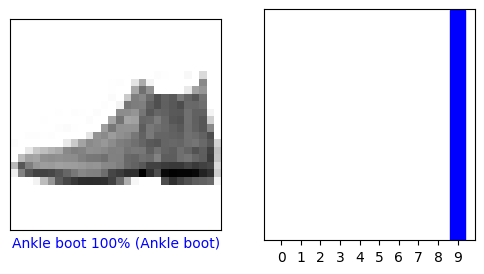

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

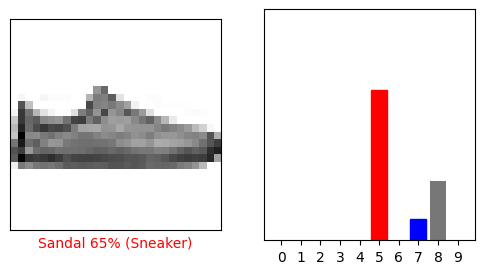

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

让我们用模型的预测绘制几张图像。请注意，即使置信度很高，模型也可能出错。

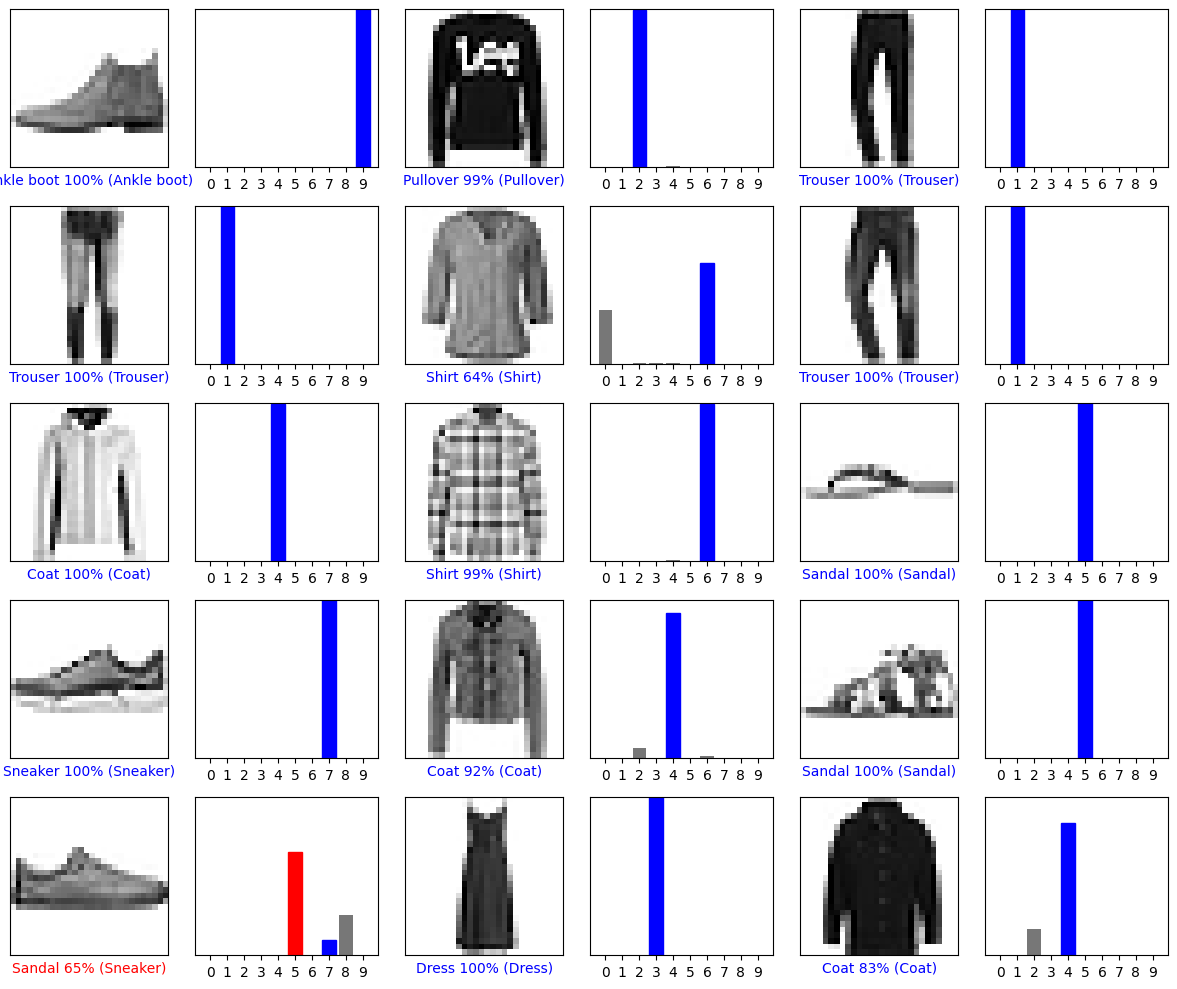

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 使用训练好的模型

最后，使用训练好的模型对单个图像进行预测。

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 模型经过了优化，可同时对一个*批*或一组样本进行预测。因此，即便您只使用一个图像，您也需要将其添加到列表中：

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


现在预测这个图像的正确标签：

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 48ms/step


[[1.8946848e-05 8.3171351e-16 9.9309057e-01 8.6931016e-13 5.6834291e-03
  8.8734559e-13 1.2070854e-03 1.5665156e-16 1.2896362e-11 6.2792527e-16]]


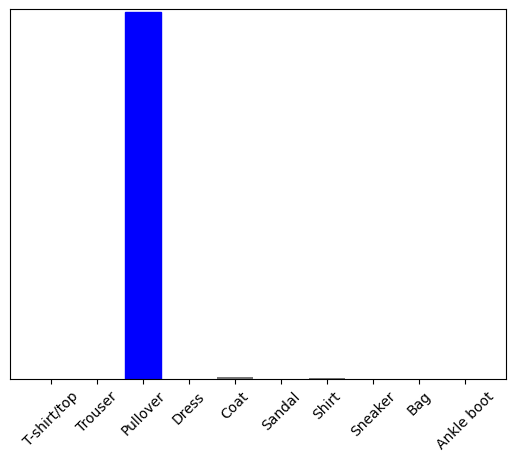

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`keras.Model.predict` 会返回一组列表，每个列表对应一批数据中的每个图像。在批次中获取对我们（唯一）图像的预测：

In [31]:
np.argmax(predictions_single[0])

2

该模型会按照预期预测标签。